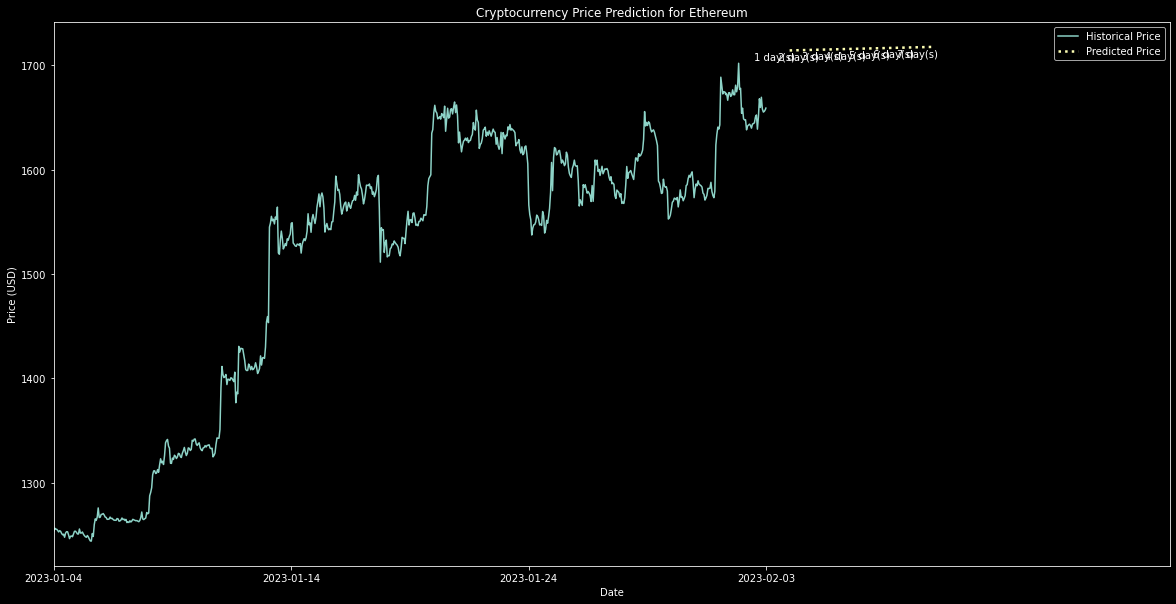

In [59]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# get historical data for a specific cryptocurrency
def get_historical_data(symbol):
    url = f'https://api.coingecko.com/api/v3/coins/{symbol}/market_chart?vs_currency=usd&days=30'
    response = requests.get(url)
    data = response.json()
    return data['prices']


def prepare_data(data):
    df = pd.DataFrame(data, columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df.sort_index(ascending=True, inplace=True)
    return df


def predict_price(df, days=7):
    X = np.array(range(len(df))).reshape(-1, 1)
    y = df['price'].values
    model = LinearRegression()
    model.fit(X, y)
    future_predictions = model.predict(np.array(range(len(df), len(df) + days)).reshape(-1, 1))
    return future_predictions

def plot_data(df, predictions):
    plt.figure(figsize=(20, 10))
    plt.plot(df.index, df['price'], label='Historical Price')
    future_dates = [df.index[-1] + pd.Timedelta(i, unit='d') for i in range(1, len(predictions)+1)]
    plt.plot(future_dates, predictions, label='Predicted Price', linestyle='dotted', linewidth=2.5)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(f'Cryptocurrency Price Prediction for {symbol.capitalize()}')
    plt.legend()
    
  
    for i, pred in enumerate(predictions):
        plt.annotate(f'{i+1} day(s)', (future_dates[i], pred), textcoords="offset points", xytext=(-15,-10), ha='center')
        

    plt.xlim(df.index[0], future_dates[-1] + pd.Timedelta(10, unit='d'))
    

    plt.xticks(pd.date_range(start=df.index[0], end=future_dates[-1], freq='10D'))
    
    plt.show()

symbol = 'ethereum' # change to the desired cryptocurrency symbol
data = get_historical_data(symbol)
df = prepare_data(data)
predictions = predict_price(df)
plot_data(df, predictions)
